In [ ]:
OLLAMA_BASE_URL = "http://ollama:11434/v1"
MODEL = "llama3.2"

In [7]:
from pydantic_ai.models.openai import OpenAIChatModel
from pydantic_ai.providers.ollama import OllamaProvider


ollama_model = OpenAIChatModel(
    model_name=MODEL,
    provider=OllamaProvider(base_url=OLLAMA_BASE_URL),
)

## Chain of Thought

Chain of Thought (CoT) prompting is a technique that encourages the model to generate a series of intermediate reasoning steps before giving a final answer. This is particularly useful for complex problems that require logic, arithmetic, or multi-step reasoning. By thinking step-by-step, the model is more likely to arrive at the correct conclusion.

Here is an example of how to use it.


In [ ]:
from pydantic import BaseModel, Field
from pydantic_ai import Agent


class PlainAnswer(BaseModel):
    answer: int = Field(description="Answer to the question")


agent = Agent(ollama_model, output_type=PlainAnswer, retries=10)

prompt = ("How many times does the letter 'r' appear in the word 'strawberry'?",)

result = await agent.run(prompt)
print(result.output)

answer=1


In [ ]:
from pydantic_ai import Agent


class CoTAnswer(BaseModel):
    thinking: str = Field(
        description=(
            "First, break down the user's question to identify the core task. "
            "Second, outline the sequential steps required to solve the task. "
            "Third, execute each step, showing your reasoning and any calculations involved. "
            "The thinking process should logically lead to the final answer."
        )
    )
    answer: int = Field(
        description="The final numerical answer derived from the step-by-step thinking process."
    )


agent = Agent(ollama_model, output_type=CoTAnswer, retries=10)

prompt = "How many times does the letter 'r' appear in the word 'strawberry'?"

result = await agent.run(prompt)
print("Thinking process:")
print(result.output.thinking)
print("\nFinal Answer:")
print(result.output.answer)

Thinking process:
To solve this problem, we need to count the frequency of the letter 'r' in the word strawberry. Break down the task: 1. Identify the core task: find the number of times the letter 'r' appears. 2. Outline the sequential steps: a. Convert the word to lowercase to ignore case sensitivity. b. Initialize a counter variable to zero. c. Iterate over each character in the word, checking if the character is equal to 'r'. Increment the counter for each occurrence of 'r'. d. Report the final count as the answer.

Final Answer:
3


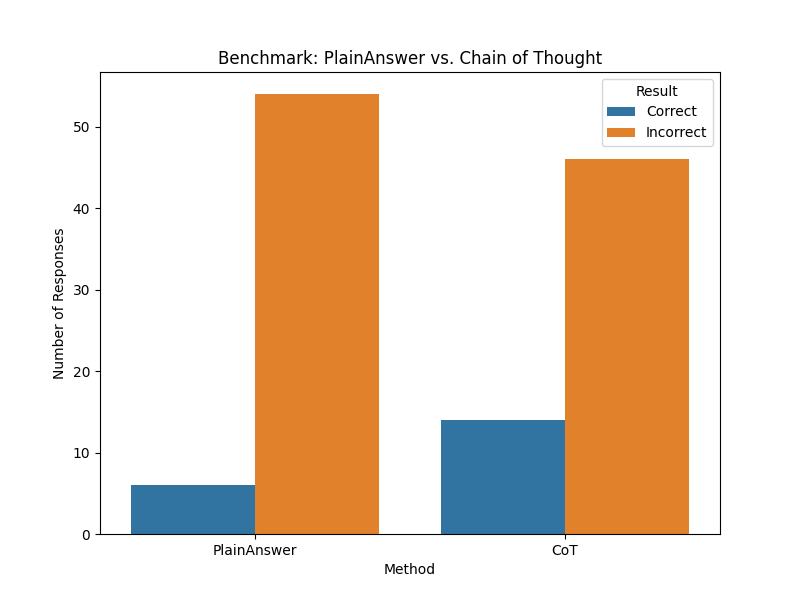